<center><h1> AI  Lab Assignment 4<h1></center>



**Name**:-  Kota Sai Durga Kamesh  

**Section**:-  B Tech CSE-1  

**Roll** **No**:-  1806097  

**Lab Course Name**:-  Artificial Intelligence Lab  

**Lab Course Code**:-  CSL5402

**Submitted Date** :- 13 / 09 / 2020  

**Deadline Date**:-    17 /09 / 2020

In [92]:
cd /content/drive/My Drive/Machine Learning With Python/Lab4 11-9-2020

/content/drive/My Drive/Machine Learning With Python/Lab4 11-9-2020


<center><h1> Question 1 </h1></center>

<p>

**Perform the following pre-processing steps for the given dataset (Q1_titanic.csv). Survived/ Not-Survived is represented by 1/0 respectively** <br><br>

**Pre-processing steps**: <br><br>

1. **Drop the following columns from the dataset:**   
    'PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Parch' <br>
2. **Convert 'sex' column information in numeric form:**   
  * Replace 'male' with 1 and 'female' with 0
3. **Replace the missing values in 'Age' column as follows:**
  * If Passenger class is 1: Age=37
  * If Passenger class is 2: Age=30
  * If Passenger class id 3: Age=24
4. **Replace missing values by the average value of that column.**

**After the pre-processing steps train Logistic Regression classifier (use test split = 0.30, and random state = 42).  Use confusion matrix, accuracy score and classification report to measure the performance of the classifiers.**
</p>


## Import Libraries

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as m
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

## Loading Of Dataset

In [94]:
dataset=pd.read_csv('1Q_titanic.csv')

In [95]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Preprocessing the Dataset

### 1. Dropping of Columns

In [96]:
dataset.drop(['PassengerId'],inplace=True,axis=1)

In [97]:
dataset.drop(['Name','Ticket','Cabin','Embarked','Parch'],inplace=True,axis=1)

In [98]:
dataset.tail()

,Survived,Pclass,Sex,Age,SibSp,Fare
886,0,2,male,27.0,0,13.00
887,1,1,female,19.0,0,30.00
888,0,3,female,NaN,1,23.45
889,1,1,male,26.0,0,30.00
890,0,3,male,32.0,0,7.75


### 2. Convert "Sex" column to numeric *form*

In [99]:
sex_mapping={'male':1,'female':0}

In [100]:
dataset['Sex']=dataset['Sex'].map(sex_mapping)

In [101]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,1,22.0,1,7.2500
1,1,1,0,38.0,1,71.2833
2,1,3,0,26.0,0,7.9250
3,1,1,0,35.0,1,53.1000
4,0,3,1,35.0,0,8.0500


### Handling Missing Values in Age

**Given Rules are** :-

  * If Passenger class is 1: Age=37  
  * If Passenger class is 2: Age=30
  * If Passenger class id 3: Age=24


* Performing the check of whether the age column of dataset whose Passenger Class 1 is having the missing values or not if it exists then age column missing values are replaced with 37

In [102]:
dataset['Age'][dataset['Pclass']==1].isnull().any()

True

In [103]:
df_class1=dataset['Pclass']==1

In [104]:
df_class1.head()

0    False
1     True
2    False
3     True
4    False
Name: Pclass, dtype: bool

In [105]:
dataset.loc[df_class1,'Age']=dataset.loc[df_class1,'Age'].fillna(37)

In [106]:
dataset['Age'][dataset['Pclass']==1].isnull().any()

False

* Performing the check of whether the age column of dataset whose Passenger Class 2 is having the missing values or not if it exists then age column missing values are replaced with 30

In [107]:
dataset['Age'][dataset['Pclass']==2].isnull().any()

True

In [108]:
df_class2=dataset['Pclass']==2

In [109]:
df_class2.head()

0    False
1    False
2    False
3    False
4    False
Name: Pclass, dtype: bool

In [110]:
dataset.loc[df_class2,'Age']=dataset.loc[df_class2,'Age'].fillna(30)

In [111]:
dataset['Age'][dataset['Pclass']==2].isnull().any()

False

* Performing the check of whether the age column of dataset whose Passenger Class 3 is having the missing values or not if it exists then age column missing values are replaced with 24

In [112]:
dataset['Age'][dataset['Pclass']==3].isnull().any()

True

In [113]:
df_class3=dataset['Pclass']==3

In [114]:
df_class3.head()

0     True
1    False
2     True
3    False
4     True
Name: Pclass, dtype: bool

In [115]:
dataset.loc[df_class3,'Age']=dataset.loc[df_class3,'Age'].fillna(24)

In [116]:
dataset['Age'][dataset['Pclass']==3].isnull().any()

False

### Replace missing values by the average value of that column.

Checking which columns are having missing values or not




In [117]:
dataset.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Fare        False
dtype: bool

By this we got to a conclusion that there are no missing values ad there is no need to replace

### Splitting the dataset

Splitting the dataset into features and labels

In [118]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,1,22.0,1,7.2500
1,1,1,0,38.0,1,71.2833
2,1,3,0,26.0,0,7.9250
3,1,1,0,35.0,1,53.1000
4,0,3,1,35.0,0,8.0500


In [119]:
features=dataset.iloc[:,1:]

In [120]:
labels=dataset.iloc[:,0]

Splitting features and labels of dataset to train and test datasets

In [121]:
feature_train,feature_test,label_train,label_test=train_test_split(features,labels,test_size=0.3,random_state=42)

In [122]:
feature_train.head()

,Pclass,Sex,Age,SibSp,Fare
445,1,1,4.0,0,81.8583
650,3,1,24.0,0,7.8958
172,3,0,1.0,1,11.1333
450,2,1,36.0,1,27.7500
314,2,1,43.0,1,26.2500


In [123]:
label_train.tail()

106    1
270    0
860    0
435    1
102    0
Name: Survived, dtype: int64

Counter Plot of label_train and label_test

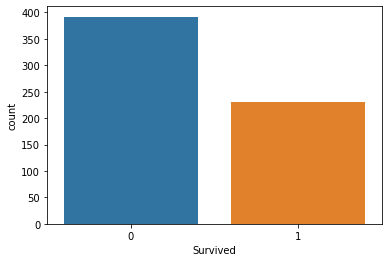

In [124]:
sns.countplot(label_train)

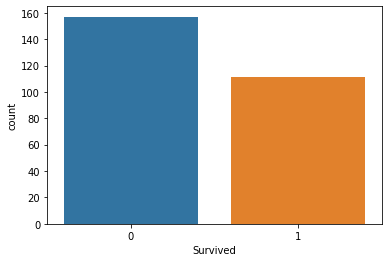

In [125]:
sns.countplot(label_test)

### Converting dataframe to array

In [126]:
label_train=np.array(label_train)

label_test=np.array(label_test)

feature_train=np.array(feature_train)

feature_test=np.array(feature_test)

# Model Training

In [127]:
model=LogisticRegression(max_iter=200)

In [128]:
model.fit(feature_train,label_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Predicting Test Variables

In [129]:
label_pred=model.predict(feature_test)

In [130]:
label_pred[:10]

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1])

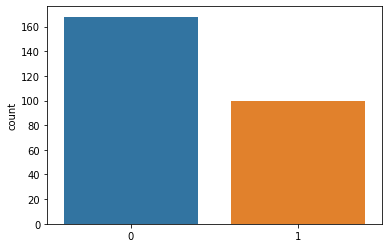

In [131]:
sns.countplot(label_pred)

# Measuring Metrics

In [132]:
m.accuracy_score(label_test,label_pred)

0.8246268656716418

In [133]:
print(m.confusion_matrix(label_test,label_pred))

[[139  18]
 [ 29  82]]


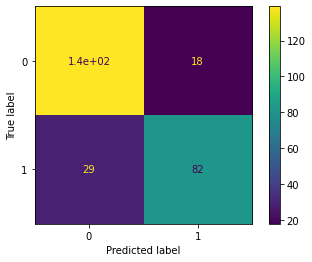

In [134]:
m.plot_confusion_matrix(model,feature_test,label_test)

In [135]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       157
           1       0.82      0.74      0.78       111

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.82       268
weighted avg       0.82      0.82      0.82       268



<center><h1>Question 2 </h2></center>

**Perform the following pre-processing steps on the given text dataset (Q2_hate_speech.csv).**   

1. Convert the text into lowercase. 
2. Remove all the punctuations
3. Remove the stopwords
4. Perform stemming 
5. Perform lemmatization

**After all the pre-processing write the pre-processed text with label information into a CSV file with the name of Pre-processed_text.csv**


# Importing Libraries

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [137]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [138]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Loading the Dataset

In [139]:
dataset=pd.read_csv('2Q_hate_speech.csv')

In [140]:
dataset.head()

,tweet_id,text,task1,task2,ID
0,1123757263427186690,"hate wen females hit ah nigga with tht bro 😂😂,...",HOF,PRFN,hasoc_2020_en_2574
1,1123733301397733380,RT @airjunebug: When you're from the Bay but y...,HOF,PRFN,hasoc_2020_en_3627
2,1123734094108659712,RT @DonaldJTrumpJr: Dear Democrats: The Americ...,NOT,NONE,hasoc_2020_en_3108
3,1126951188170199049,RT @SheLoveTimothy: He ain’t on drugs he just ...,NOT,PRFN,hasoc_2020_en_3986
4,1126863510447710208,RT @TavianJordan: Summer ‘19 I’m coming for yo...,NOT,NONE,hasoc_2020_en_5152


# Preprocessing the Text in Dataset

## Splitting the text data from Dataset

In [141]:
text_data=dataset['text']

In [142]:
text_data=list(text_data)

In [143]:
text_data[10:30]

['@Nig_BMT ‘In the newspaper ‘ I weak😂😂😂. Bro this ending has pissed me off😭',
 'Nobody:\nAngie: U getting dick ? Cus ur ass looks bigger',
 'RT @tedlieu: Oh look, @realDonaldTrump is now sending Rudy Giuliani to actively seek the assistance of a foreign government to help Trump i…',
 'RT @tikkkii: bitches in real life be bird as fuck and only good for sex, I’m sick',
 '@thekoyostore @Rainbow6Game hnnnng I need',
 'It was obvious from the very beginning he always regarded himself as a maverick, which the PM’s letter also suggest… https://t.co/RIVYzNePq1',
 'Get surgical with that shit 💉 https://t.co/5u8Di1waFC',
 'I really don’t want to start my weekend off this way - yet here I am. This vile post should be labeled a lie-… https://t.co/RFYSuDDb1b',
 'SUCH A FUCKING BEAST HONESTLY👀🐐🐐🐐',
 '@StrangeMentle DELTARUNES TRACKS IS FUCKING BANGERS ALL OF EM',
 'RT @NataliaNoyes: might fuck around and go missing for a few months',
 'RT @melissafumeros: i mean honestly i’ve seen a lot of dumb shi

## Convert Text into Lower Case

In [144]:
text_data_lower=[x.lower() for x in text_data]

In [145]:
text_data_lower[10:30]

['@nig_bmt ‘in the newspaper ‘ i weak😂😂😂. bro this ending has pissed me off😭',
 'nobody:\nangie: u getting dick ? cus ur ass looks bigger',
 'rt @tedlieu: oh look, @realdonaldtrump is now sending rudy giuliani to actively seek the assistance of a foreign government to help trump i…',
 'rt @tikkkii: bitches in real life be bird as fuck and only good for sex, i’m sick',
 '@thekoyostore @rainbow6game hnnnng i need',
 'it was obvious from the very beginning he always regarded himself as a maverick, which the pm’s letter also suggest… https://t.co/rivyznepq1',
 'get surgical with that shit 💉 https://t.co/5u8di1wafc',
 'i really don’t want to start my weekend off this way - yet here i am. this vile post should be labeled a lie-… https://t.co/rfysuddb1b',
 'such a fucking beast honestly👀🐐🐐🐐',
 '@strangementle deltarunes tracks is fucking bangers all of em',
 'rt @natalianoyes: might fuck around and go missing for a few months',
 'rt @melissafumeros: i mean honestly i’ve seen a lot of dumb shi

## Remove all Punctuations from the text

In [146]:
text_data_nopunc=[]

for x in text_data_lower:
  y=re.sub('[^a-zA-Z]',' ',x)
  text_data_nopunc.append(y)


In [147]:
text_data_nopunc[10:30]

[' nig bmt  in the newspaper   i weak     bro this ending has pissed me off ',
 'nobody  angie  u getting dick   cus ur ass looks bigger',
 'rt  tedlieu  oh look   realdonaldtrump is now sending rudy giuliani to actively seek the assistance of a foreign government to help trump i ',
 'rt  tikkkii  bitches in real life be bird as fuck and only good for sex  i m sick',
 ' thekoyostore  rainbow game hnnnng i need',
 'it was obvious from the very beginning he always regarded himself as a maverick  which the pm s letter also suggest  https   t co rivyznepq ',
 'get surgical with that shit   https   t co  u di wafc',
 'i really don t want to start my weekend off this way   yet here i am  this vile post should be labeled a lie   https   t co rfysuddb b',
 'such a fucking beast honestly    ',
 ' strangementle deltarunes tracks is fucking bangers all of em',
 'rt  natalianoyes  might fuck around and go missing for a few months',
 'rt  melissafumeros  i mean honestly i ve seen a lot of dumb shit

## Remove all Stopwords in English from text

In [148]:
stop_words=stopwords.words('english')

In [149]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [150]:
text_data_rmstop=[]


In [151]:
for x in text_data_nopunc:
  y=x.split(' ')
  y=[word for word in y if (word not in stop_words) and (len(word)>0) ]
  y=' '.join(y)
  text_data_rmstop.append(y)

In [152]:
text_data_rmstop[10:20]

['nig bmt newspaper weak bro ending pissed',
 'nobody angie u getting dick cus ur ass looks bigger',
 'rt tedlieu oh look realdonaldtrump sending rudy giuliani actively seek assistance foreign government help trump',
 'rt tikkkii bitches real life bird fuck good sex sick',
 'thekoyostore rainbow game hnnnng need',
 'obvious beginning always regarded maverick pm letter also suggest https co rivyznepq',
 'get surgical shit https co u di wafc',
 'really want start weekend way yet vile post labeled lie https co rfysuddb b',
 'fucking beast honestly',
 'strangementle deltarunes tracks fucking bangers em']

## Perform Stemming

In [153]:
stemmer=PorterStemmer()

In [154]:
text_data_stem=[]

In [155]:
for x in text_data_rmstop:
  y=x.split(' ')
  y=[stemmer.stem(word) for word in y]
  y=' '.join(y)
  text_data_stem.append(y)

In [156]:
text_data_stem[20:40]

['rt natalianoy might fuck around go miss month',
 'rt melissafumero mean honestli seen lot dumb shit twitter one realli dumbest congrat emili ur stupid',
 'rt keitholbermann nyc found dog alert still miss still th somebodi miss pleas rt http co go',
 'aewrestl book hangman vs orang cassidi yet',
 'whitefacessbu luckylotusult yeah shook found lmao talent kid though http co ysjfz v',
 'viddywel think funni',
 'rt zipamoney holi shit get best fuck sub loui vuitton bag medic student lawyer nurs',
 'brewer heard daishatatianna dont need your whole life stori shit public record look',
 'rt tyousb drug dealer got smoke drug dealer got edibl know yo fat ass eat http co',
 'lfc christiansymoh lose fam',
 'rt incmp live congress presid rahul gandhi address public meet hoshangabad madhya pradesh abhoganyay http co ag ucrh',
 'rt realmenswallow hhhoottttt min raw way fuck fest w atla grant avatar akyia ryan power amp theknight see',
 'rt lilh watch son come look like damn daddi',
 'rt sid lambert

## Perform Lemmatization

In [157]:
text_data_lemma=[]

In [158]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [159]:
lemmatizer=WordNetLemmatizer()

In [160]:
for x in text_data_rmstop:
  y=x.split(' ')
  y=[lemmatizer.lemmatize(word) for word in y]
  y=' '.join(y)
  text_data_lemma.append(y)


In [161]:
text_data_lemma[20:40]

['rt natalianoyes might fuck around go missing month',
 'rt melissafumeros mean honestly seen lot dumb shit twitter one really dumbest congrats emily ur stupid',
 'rt keitholbermann nyc found dog alert still missing still th somebody missing please rt http co go',
 'aewrestling booked hangman v orange cassidy yet',
 'whitefacessbu luckylotusult yeah shook found lmao talented kid though http co ysjfz v',
 'viddywel think funny',
 'rt zipamoney holy shit get best fucking sub louis vuitton bag medical student lawyer nurse',
 'brewer heard daishatatianna dont need youre whole life story shit public record look',
 'rt tyousb drug dealer got smoke drug dealer got edible know yo fat as eat http co',
 'lfc christiansymoh losing fam',
 'rt incmp live congress president rahul gandhi address public meeting hoshangabad madhya pradesh abhoganyay http co ag ucrh',
 'rt realmenswallow hhhoottttt min raw way fuck fest w atlas grant avatar akyia ryan power amp theknights see',
 'rt lilheli watch son co

## Creating the Preprocessed Dataframe

In [162]:
dict_text={'text_stem':text_data_stem,'text_lemma':text_data_lemma}

In [163]:
processed_df=pd.DataFrame(dict_text)

In [164]:
processed_df.head()

,text_stem,text_lemma
0,hate wen femal hit ah nigga tht bro tryna make...,hate wen female hit ah nigga tht bro tryna mak...
1,rt airjunebug bay realli ny nigga heart w supp...,rt airjunebug bay really ny nigga heart w supp...
2,rt donaldjtrumpjr dear democrat american peopl...,rt donaldjtrumpjr dear democrat american peopl...
3,rt shelovetimothi drug bore shit bore http co ...,rt shelovetimothy drug bored shit bored http c...
4,rt tavianjordan summer come bore shit beach da...,rt tavianjordan summer coming boring shit beac...


In [165]:
dataset_preprocessed=pd.concat([dataset,processed_df],axis=1)

In [166]:
dataset_preprocessed.head()

,tweet_id,text,task1,task2,ID,text_stem,text_lemma
0,1123757263427186690,"hate wen females hit ah nigga with tht bro 😂😂,...",HOF,PRFN,hasoc_2020_en_2574,hate wen femal hit ah nigga tht bro tryna make...,hate wen female hit ah nigga tht bro tryna mak...
1,1123733301397733380,RT @airjunebug: When you're from the Bay but y...,HOF,PRFN,hasoc_2020_en_3627,rt airjunebug bay realli ny nigga heart w supp...,rt airjunebug bay really ny nigga heart w supp...
2,1123734094108659712,RT @DonaldJTrumpJr: Dear Democrats: The Americ...,NOT,NONE,hasoc_2020_en_3108,rt donaldjtrumpjr dear democrat american peopl...,rt donaldjtrumpjr dear democrat american peopl...
3,1126951188170199049,RT @SheLoveTimothy: He ain’t on drugs he just ...,NOT,PRFN,hasoc_2020_en_3986,rt shelovetimothi drug bore shit bore http co ...,rt shelovetimothy drug bored shit bored http c...
4,1126863510447710208,RT @TavianJordan: Summer ‘19 I’m coming for yo...,NOT,NONE,hasoc_2020_en_5152,rt tavianjordan summer come bore shit beach da...,rt tavianjordan summer coming boring shit beac...


# Writing Preprocessed DataFrame to CSV File

In [167]:
dataset_preprocessed.to_csv('Pre-processed_text.csv',index=False)